In [1]:
import PyQt5
from PyQt5 import Qt
Qt.QT_VERSION_STR
FORCE_ENABLE_INLINE = True

In [2]:
import os
import sys
import gin
import numpy as np
import pandas as pd
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib
matplotlib.use('Qt5Agg')

import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
if Qt.QT_VERSION_STR and not FORCE_ENABLE_INLINE:
    %matplotlib qt
else:
    %matplotlib inline
%load_ext autoreload
%autoreload 2

In [9]:
params = {
                    "sep": '\s+',
                    #"nrows": 10000,
                    "encoding": 'utf-8',
                    "names":  ['event',  'ntrack',  'det', 'station','side', 'z', 'y', 'x', 'time','dX', 'dY', 'dZ', 'dTime']
                 }
data = pd.read_csv("../data_cbm/hits10_withStations.txt", **params)
data

,event,ntrack,det,station,side,z,y,x,time,dX,dY,dZ,dTime
0,0,0,0,0,0,189.10,-6.511201,37.892959,-1.500000,0.000000,0.192039,0.192039,4.000000
1,0,0,0,0,0,189.10,1.125580,51.584594,-0.500000,0.000000,0.257713,0.257713,4.000000
2,0,0,0,0,0,189.10,-9.962932,52.476272,0.500000,0.000000,0.266788,0.266788,4.000000
3,0,0,0,0,0,189.10,-11.953212,39.431012,8.500000,0.000000,0.183792,0.183792,3.572228
4,0,0,0,0,0,189.10,-0.469619,35.874186,1.500000,0.000000,0.179198,0.179198,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2578423,999,1,2,0,0,867.19,201.003000,60.939840,30.982184,0.288675,0.135316,0.720000,0.080000
2578424,999,1,2,0,0,853.57,-59.802354,42.676923,29.158208,0.288675,0.135316,0.720000,0.080000
2578425,999,1,2,0,0,862.65,-66.919929,51.057060,553.672254,0.288675,0.135316,0.720000,0.080000
2578426,999,1,2,0,0,853.57,-60.823959,107.611993,29.631995,0.288675,0.135316,0.720000,0.080000


In [10]:
data = data.dropna()
data = data.sort_values(by=['event', 'det', 'station','side', 'ntrack'], ignore_index=True)
data

,event,ntrack,det,station,side,z,y,x,time,dX,dY,dZ,dTime
0,0,0,0,0,0,189.10,-6.511201,37.892959,-1.500000,0.000000,0.192039,0.192039,4.000000
1,0,0,0,0,0,189.10,1.125580,51.584594,-0.500000,0.000000,0.257713,0.257713,4.000000
2,0,0,0,0,0,189.10,-9.962932,52.476272,0.500000,0.000000,0.266788,0.266788,4.000000
3,0,0,0,0,0,189.10,-11.953212,39.431012,8.500000,0.000000,0.183792,0.183792,3.572228
4,0,0,0,0,0,189.10,-0.469619,35.874186,1.500000,0.000000,0.179198,0.179198,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2578423,999,1,2,0,0,867.19,201.003000,60.939840,30.982184,0.288675,0.135316,0.720000,0.080000
2578424,999,1,2,0,0,853.57,-59.802354,42.676923,29.158208,0.288675,0.135316,0.720000,0.080000
2578425,999,1,2,0,0,862.65,-66.919929,51.057060,553.672254,0.288675,0.135316,0.720000,0.080000
2578426,999,1,2,0,0,853.57,-60.823959,107.611993,29.631995,0.288675,0.135316,0.720000,0.080000


In [5]:
data.x.min(), data.x.max(), data.y.min(), data.y.max(), data.z.min(), data.z.max()

(-438.722433, 439.285595, -608.705658, 609.605659, 189.1, 867.190002)

In [6]:
data[data.det == 0].station.unique(), data[data.det == 1].station.unique(), data[data.det == 2].station.unique()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64),
 array([0, 1, 2, 3], dtype=int64),
 array([0], dtype=int64))

In [11]:
data.event.nunique(), data.ntrack.unique()

(1000, array([0, 1, 2, 3], dtype=int64))

In [7]:
t = 0
f = 0
for ev_id, ev in data.groupby('event'):
    if ev[ev.ntrack >= 2].empty:
        f+=1
    else:
        t+=1
print(f"imbalanse events: {t / float(f)}")

print(f"count true: {t}")
print(f"count false: {f}")

imbalanse events: 0.2136279926335175
count true: 116
count false: 543


In [53]:
def visualize_simple_3d(data, axes=['x','y','z'], titleAx=['X', 'Y', 'Z'], title=None, scatter_params=None):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    if not scatter_params:
        scatter_params = {}
    ax.scatter(data[axes[0]], data[axes[1]], data[axes[2]], **scatter_params)
    ax.set_xlabel(titleAx[0])
    ax.set_ylabel(titleAx[1])
    ax.set_zlabel(titleAx[2])
    if title:
        plt.title(title)
    plt.tight_layout()
    plt.show()

In [54]:
true_events = data[data.ntrack > 1]
false_events = data[data.ntrack < 2]
one_true_event = true_events[true_events.event == true_events.event.unique()[0]]
one_false_event = false_events[false_events.event == false_events.event.unique()[0]]

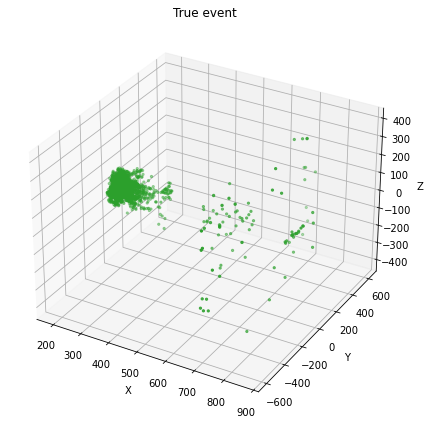

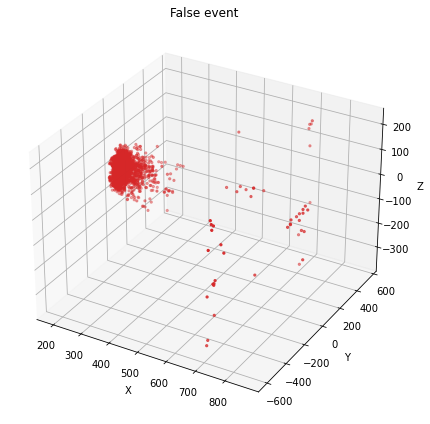

In [59]:
visualize_simple_3d(one_true_event, title='True event', scatter_params={'c':'tab:green', 's':5})
visualize_simple_3d(one_false_event, title='False event', scatter_params={'c':'tab:red', 's':5})

,event,ntrack,det,x,y,z,time,dX,dY,dZ,dTime
0,0,0,0,189.10,-6.511201,37.892959,-1.500000,0.000000,0.192039,0.192039,4.000000
1,0,0,0,189.10,1.125580,51.584594,-0.500000,0.000000,0.257713,0.257713,4.000000
2,0,0,0,189.10,-9.962932,52.476272,0.500000,0.000000,0.266788,0.266788,4.000000
3,0,0,0,189.10,-11.953212,39.431012,8.500000,0.000000,0.183792,0.183792,3.572228
4,0,0,0,189.10,-0.469619,35.874186,1.500000,0.000000,0.179198,0.179198,4.000000
...,...,...,...,...,...,...,...,...,...,...,...
2481,0,0,2,814.75,-96.737795,-1.748837,38.400708,0.288675,-0.135316,-0.720000,0.080000
2482,0,0,2,805.67,-31.269614,2.073910,32.015674,0.288675,-0.135316,-0.720000,0.080000
2483,0,0,2,805.67,-35.721900,-14.902660,26.816532,0.288675,-0.135316,-0.720000,0.080000
2484,0,0,2,805.67,-37.855691,-12.220790,26.866241,0.288675,-0.135316,-0.720000,0.080000


In [49]:
one_true_event

,event,ntrack,det,x,y,z,time,dX,dY,dZ,dTime
54455,21,2,0,189.10,0.182922,41.922335,-3.500000,0.000000,0.209393,0.209393,4.000000
54456,21,2,0,189.10,-25.658136,64.312625,0.500000,0.000000,0.345846,0.345846,4.000000
54457,21,2,0,189.10,-11.341749,41.889022,3.500000,0.000000,0.156312,0.156312,2.884441
54458,21,2,0,189.10,-5.802571,20.574366,1.500000,0.000000,0.099062,0.099062,3.715537
54459,21,2,0,189.10,-6.806672,25.853550,1.500000,0.000000,0.133532,0.133532,4.000000
...,...,...,...,...,...,...,...,...,...,...,...
57107,21,2,2,805.67,-40.878150,-18.238224,26.959002,0.288675,-0.135316,-0.720000,0.080000
57108,21,2,2,867.19,62.034400,-59.311520,36.032542,0.288675,0.135316,0.720000,0.080000
57109,21,2,2,853.57,110.722000,46.444601,46.069412,0.288675,0.135316,0.720000,0.080000
57110,21,2,2,853.57,100.510080,108.838984,35.200762,0.288675,0.135316,0.720000,0.080000
